In [ ]:
import matplotlib.pyplot as plt 
import scipy.integrate as si
import numpy as np

#defining variables

M_e = 5.972*10**24  #kg
M_m= 7.34767309*10**22 # kg
G = 6.67*10**(-11)
r_m=3.84e8 #m distance of moon to earth


#defining function
def func(t,state):
    x_m, y_m, vm_x, vm_y = state    #tuple with variab;es, tuple needs to be unpacked: extract the values of the tuple back into variables. 
                                        # writing it as state=(xm,ym,vmx,vyx) assumes that those values already exist
    
    r_m=(x_m**2+y_m**2)**0.5     #position of moon wrt earth
    
    dxm_dt = vm_x       
    dym_dt = vm_y       
    dvmx_dt = -(M_e*G*x_m)/(r_m**3)
    dvmy_dt = -(M_e*G*y_m)/(r_m**3)

    derivatives=(dxm_dt,dym_dt,dvmx_dt,dvmy_dt)

    return derivatives

# Moon orbit

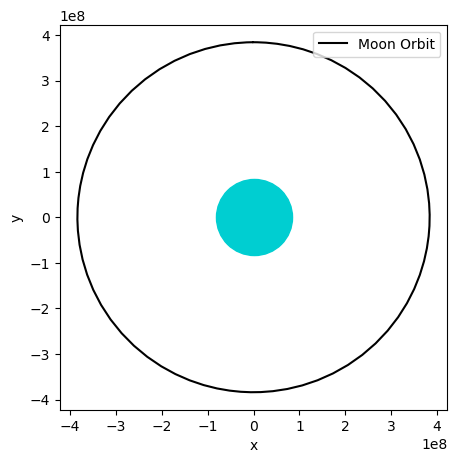

In [207]:
#CIRCULAR ORBIT
x_m0= 0 
y_m0= r_m
vm_x0=(G*M_e/r_m)**0.5
vm_y0= 0

t_min=0
t_max=2.366e6 #seconds, approx time for one full orbit of moon
t_span=np.linspace(t_min,t_max,num=10000)

#tuple with initial values
initial_values=(x_m0,y_m0,vm_x0,vm_y0)

results = si.solve_ivp(func, (t_min,t_max), initial_values, method="RK45", rtol=1e-8, atol=1e-6)

#we are plotting x and y. First column of results contains time

x_values=results.y[0]
y_values=results.y[1]

fig,ax=plt.subplots(figsize=(5,5))
plt.scatter(0,0,color="darkturquoise",s=3000)
plt.plot(x_values,y_values,color="black",label="Moon Orbit")
ax.set_xlabel("x")
ax.set_ylabel("y")

plt.legend(loc="upper right")



## Probe in lunar orbit

(300000000.0, 400000000.0)

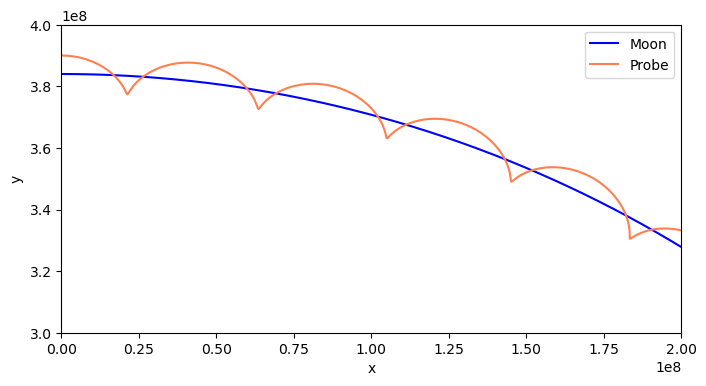

In [ ]:
#Probe in lunar orbit

#we introduce new variables to represent the position of the probe

#defining function
def func2(t,state):
    x_m, y_m, vm_x, vm_y, x_p, y_p, vp_x, vp_y= state    #tuple with variables, tuple needs to be unpacked: extract the values of the tuple back into variables. 
                                        # writing it as state=(xm,ym,vmx,vyx) assumes that those values already exist
    
    x_pm=x_p-x_m
    y_pm=y_p-y_m    
    
    r_m=(x_m**2+y_m**2)**0.5        #position of moon wrt to earth
    r_p=(x_p**2+y_p**2)**0.5        #position of probe wrt to earth
    r_pm=(x_pm**2+y_pm**2)**0.5     #position of probe wrt moon
    
    #moon orbit
    dxm_dt = vm_x        #vm_x
    dym_dt = vm_y        #vm_y
    dvmx_dt = -(M_e*G*x_m)/(r_m**3)
    dvmy_dt = -(M_e*G*y_m)/(r_m**3)

    #probe orbit
    dxp_dt= vp_x
    dyp_dt=vp_y
    dvpx_dt=-(M_e*G*x_p)/(r_p**3)-(M_m*G*x_pm/(r_pm**3))
    dvpy_dt=-(M_e*G*y_p)/(r_p**3)-(M_m*G*y_pm/(r_pm**3))


    derivatives=(dxm_dt,dym_dt,dvmx_dt,dvmy_dt, dxp_dt,dyp_dt, dvpx_dt, dvpy_dt)

    return derivatives

#initial values
r_pm=6e6    #orbital distance
r_m=3.84e8 #m distance of moon to earth

x_m0= 0 
y_m0= r_m
vm_x0=(G*M_e/r_m)**0.5
vm_y0= 0

#remember that conditions are wrt to EARTH not just the probe
x_p0= x_m0
y_p0=r_pm+r_m
vp_x0=vm_x0+(G*M_m/r_pm)**0.5
vp_y0=vm_y0

initial_values2=(x_m0,y_m0,vm_x0,vm_y0,x_p0,y_p0,vp_x0,vp_y0)    #new set of initial values

results = si.solve_ivp(func2, (t_min,t_max), initial_values2, method="RK45", rtol=1e-8, atol=1e-7)

#moon
x_moon=results.y[0]
y_moon=results.y[1]

#probe
x_probe=results.y[4]
y_probe=results.y[5]


#plotting
fig,ax=plt.subplots(figsize=(8,4))
ax.plot(x_moon,y_moon,color="blue", label="Moon")
ax.plot(x_probe,y_probe,color="coral",label="Probe")

plt.legend()
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_xlim(0,2e8)
ax.set_ylim(3e8,4e8)
